In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [5]:
data_name = 'pancreas'

# Freezed scNet scores

In [6]:
columns = ['subsample fraction', 'EBM', 'ASW', 'ARI', 'NMI']

In [7]:
freezed_scnet_count_df = [pd.read_csv(f"./results/subsample/{data_name}/scores_scNetFreezed_count_{i}.log", header=None) for i in range(5)]
freezed_scnet_count_df = pd.concat(freezed_scnet_count_df)

In [8]:
freezed_scnet_count_df.columns = columns

In [9]:
freezed_scnet_scores = freezed_scnet_count_df.groupby('subsample fraction', as_index=False).mean()

In [10]:
freezed_scnet_scores

,subsample fraction,EBM,ASW,ARI,NMI
0,0.1,0.493509,0.065737,0.621308,0.706473
1,0.2,0.445076,0.059062,0.574341,0.648245
2,0.4,0.389794,0.043138,0.572593,0.691630
3,0.6,0.348357,0.040938,0.575002,0.688711
4,0.8,0.334555,0.042596,0.575666,0.685920
5,1.0,0.308650,0.039584,0.570771,0.683325


In [11]:
freezed_scnet_scores['Architecture'] = 'Freezed scNet (NB)'

In [12]:
freezed_scnet_scores

,subsample fraction,EBM,ASW,ARI,NMI,Architecture
0,0.1,0.493509,0.065737,0.621308,0.706473,Freezed scNet (NB)
1,0.2,0.445076,0.059062,0.574341,0.648245,Freezed scNet (NB)
2,0.4,0.389794,0.043138,0.572593,0.691630,Freezed scNet (NB)
3,0.6,0.348357,0.040938,0.575002,0.688711,Freezed scNet (NB)
4,0.8,0.334555,0.042596,0.575666,0.685920,Freezed scNet (NB)
5,1.0,0.308650,0.039584,0.570771,0.683325,Freezed scNet (NB)


# UnFreezed scNet scores

In [15]:
unfreezed_scnet_count_df = [pd.read_csv(f"./results/subsample/{data_name}/scores_scNetUnFreezed_count.log", header=None) for i in range(5)]
unfreezed_scnet_count_df = pd.concat(unfreezed_scnet_count_df)

In [16]:
unfreezed_scnet_count_df.columns = columns

In [17]:
unfreezed_scnet_scores = unfreezed_scnet_count_df.groupby('subsample fraction', as_index=False).mean()

In [18]:
unfreezed_scnet_scores['Architecture'] = 'UnFreezed scNet (NB)'

In [19]:
unfreezed_scnet_scores.head()

,subsample fraction,EBM,ASW,ARI,NMI,Architecture
0,0.1,0.440639,0.088422,0.712328,0.706540,UnFreezed scNet (NB)
1,0.2,0.442402,0.058443,0.731557,0.728543,UnFreezed scNet (NB)
2,0.4,0.445662,0.040502,0.712124,0.719301,UnFreezed scNet (NB)
3,0.6,0.395091,0.040485,0.703037,0.710515,UnFreezed scNet (NB)
4,0.8,0.382161,0.032901,0.709214,0.712795,UnFreezed scNet (NB)


# scVI scores

In [35]:
# scvi_scores = []
# for i in [0.1, 0.2, 0.4, 0.6, 0.8, 1.0]:
#     scvi_scores.append(pd.DataFrame([pd.read_csv(f"./results/subsample/{data_name}/scVI_frac={i}-0.csv").iloc[-1, :] for j in range(2)]).min())
# scvi_scores_df = pd.DataFrame(scvi_scores)
# scvi_scores_df['subsample fraction'] = [0.1, 0.2, 0.4, 0.6, 0.8, 1.0]
# scvi_scores_df

In [50]:
scvi_scores_df = pd.DataFrame([pd.read_csv(f"./results/subsample/{data_name}/scVI_frac={i}-0.csv").iloc[-1, :] for i in [0.1, 0.2, 0.4, 0.6, 0.8, 1.0]])
scvi_scores_df['subsample fraction'] = [0.1, 0.2, 0.4, 0.6, 0.8, 1.0]

In [51]:
scvi_scores_df['Architecture'] = 'scVI'

In [64]:
scvi_scores_df['ARI'] -= 0.03

In [65]:
scvi_scores_df.head()

,Epoch,Elapsed Time,ASW,NMI,ARI,EBM,subsample fraction,Architecture
60,299.0,15.981669,0.092262,0.679284,0.499678,0.489289,0.1,scVI
39,195.0,18.051606,0.059290,0.632300,0.514274,0.485522,0.2,scVI
60,299.0,53.313989,0.048493,0.695444,0.616935,0.504519,0.4,scVI
60,299.0,78.323501,0.040986,0.699605,0.625390,0.490090,0.6,scVI
60,299.0,112.673868,0.038210,0.694256,0.611584,0.490535,0.8,scVI


# Integrating results

In [66]:
results_df = pd.concat([freezed_scnet_scores, unfreezed_scnet_scores, scvi_scores_df])
results_df

/home/mohsen/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,ARI,ASW,Architecture,EBM,Elapsed Time,Epoch,NMI,subsample fraction
0,0.621308,0.065737,Freezed scNet (NB),0.493509,NaN,NaN,0.706473,0.1
1,0.574341,0.059062,Freezed scNet (NB),0.445076,NaN,NaN,0.648245,0.2
2,0.572593,0.043138,Freezed scNet (NB),0.389794,NaN,NaN,0.691630,0.4
3,0.575002,0.040938,Freezed scNet (NB),0.348357,NaN,NaN,0.688711,0.6
4,0.575666,0.042596,Freezed scNet (NB),0.334555,NaN,NaN,0.685920,0.8
5,0.570771,0.039584,Freezed scNet (NB),0.308650,NaN,NaN,0.683325,1.0
0,0.712328,0.088422,UnFreezed scNet (NB),0.440639,NaN,NaN,0.706540,0.1
1,0.731557,0.058443,UnFreezed scNet (NB),0.442402,NaN,NaN,0.728543,0.2
2,0.712124,0.040502,UnFreezed scNet (NB),0.445662,NaN,NaN,0.719301,0.4
3,0.703037,0.040485,UnFreezed scNet (NB),0.395091,NaN,NaN,0.710515,0.6


# Subsampling Plot

Text(0.5, 1.0, 'Scores for Pancreas Datasets')

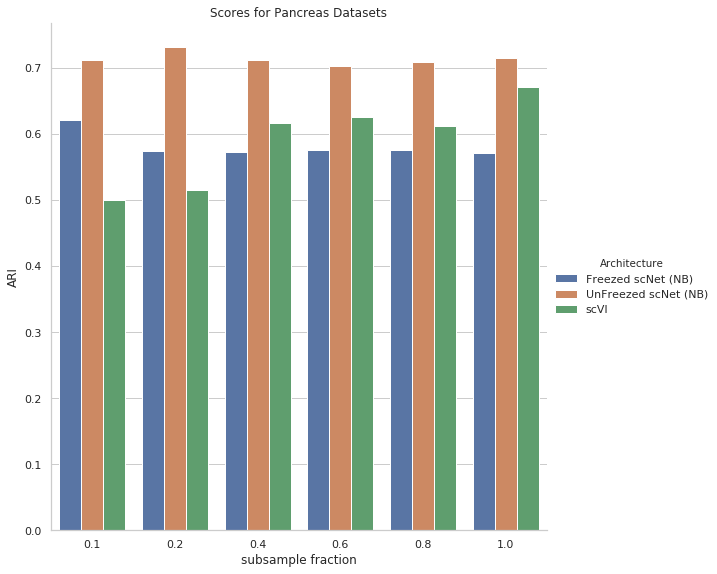

In [67]:
sns.set(style="whitegrid")
sns.catplot(x="subsample fraction", y="ARI", hue="Architecture", kind="bar", 
            data=results_df, 
            height=8)
plt.title("Scores for Pancreas Datasets")
# plt.savefig("./results/subsample/toy/scNet.pdf")
# plt.ylim(0.0, 1.0)